In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  
matplotlib.rcParams['font.size'] = 15 
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns

In [96]:
df=pd.read_csv('./chart_in_visualization.csv',encoding='utf-8')

In [41]:
pd.set_option('display.max_rows',10000)

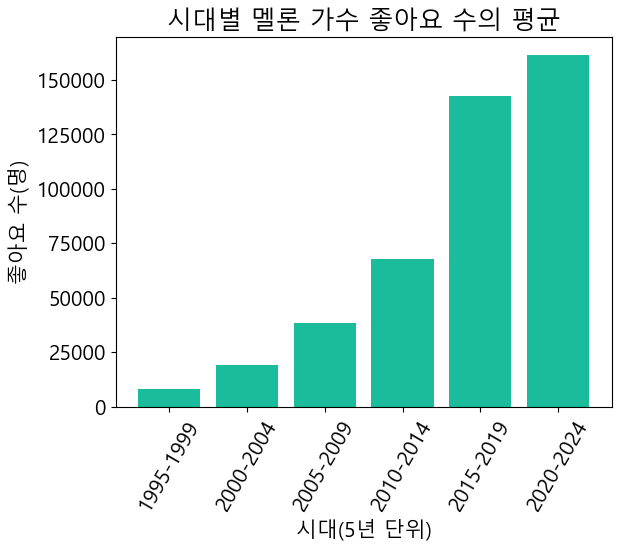

In [21]:
plt.title('시대별 멜론 가수 좋아요 수의 평균')
plt.bar(x=['1995-1999','2000-2004','2005-2009','2010-2014','2015-2019','2020-2024'],height=df.groupby('classes')['like'].mean(),
       color='#1ABC9C')
plt.xticks(rotation=60)
plt.xlabel('시대(5년 단위)')
plt.ylabel('좋아요 수(명)')
plt.show()

Text(0, 0.5, '좋아요 수(명)')

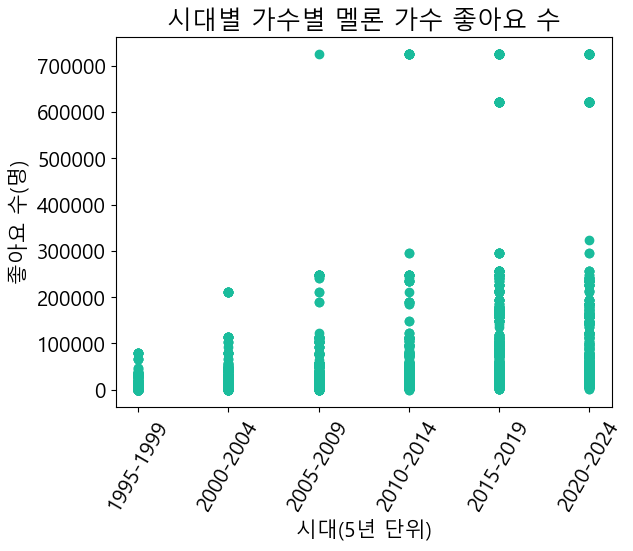

In [26]:
plt.title('시대별 가수별 멜론 가수 좋아요 수')
plt.scatter(x=df['classes'],y=df['like'],color='#1ABC9C')
plt.xticks([0, 1, 2, 3, 4, 5],['1995-1999','2000-2004','2005-2009','2010-2014','2015-2019','2020-2024'],rotation=60)
plt.xlabel('시대(5년 단위)')
plt.ylabel('좋아요 수(명)')

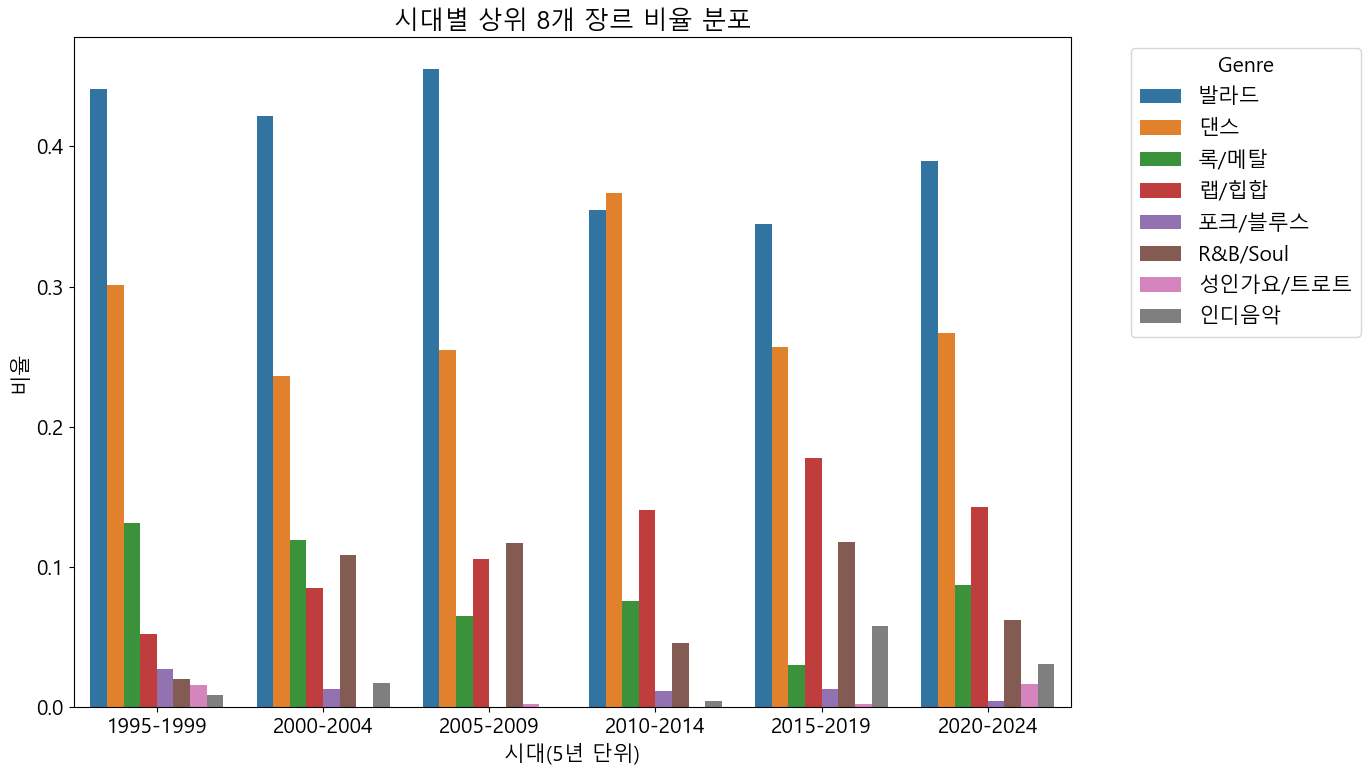

In [32]:
genre_counts = df.groupby(['classes', 'genre']).size().reset_index(name='count')

# 클래스별 총합 기준 비율 계산
genre_counts['ratio'] = genre_counts['count'] / genre_counts.groupby('classes')['count'].transform('sum')

# 클래스별 상위 8개 장르 (비율 기준으로 정렬해도 되지만 여기선 count 기준 유지)
top_genres_per_class = (
    genre_counts
    .sort_values(['classes', 'count'], ascending=[True, False])
    .groupby('classes')
    .head(8)
)

# 시각화 (비율)
plt.figure(figsize=(14, 8))
sns.barplot(data=top_genres_per_class, x='classes', y='ratio', hue='genre')
plt.title("시대별 상위 8개 장르 비율 분포")
plt.xlabel("시대(5년 단위)")
plt.ylabel("비율")
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(sorted(top_genres['classes'].unique()),['1995-1999','2000-2004','2005-2009','2010-2014','2015-2019','2020-2024'])
plt.tight_layout()
plt.show()

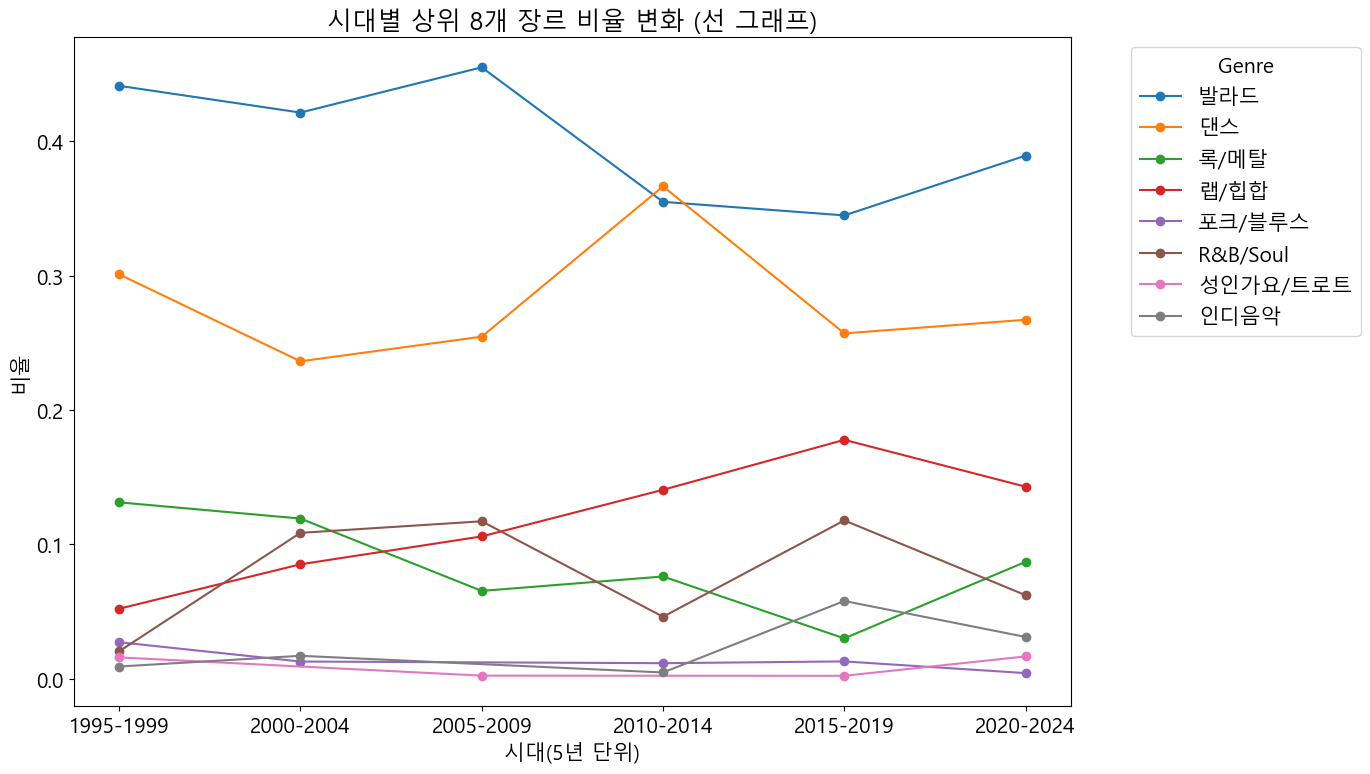

In [33]:
genre_counts = df.groupby(['classes', 'genre']).size().reset_index(name='count')
total_per_class = genre_counts.groupby('classes')['count'].transform('sum')

# 비율 추가
genre_counts['ratio'] = genre_counts['count'] / total_per_class

# 클래스별 상위 8개 장르 선택 (비율 기준으로 해도 되고, count 기준으로 해도 됨)
top_genres = (
    genre_counts
    .sort_values(['classes', 'count'], ascending=[True, False])
    .groupby('classes')
    .head(8)
)

# 고유 장르 추출
selected_genres = top_genres['genre'].unique()

# 선 그래프 그리기
plt.figure(figsize=(14, 8))
for genre in selected_genres:
    temp = top_genres[top_genres['genre'] == genre]
    plt.plot(temp['classes'], temp['ratio'], marker='o', label=genre)

plt.title("시대별 상위 8개 장르 비율 변화 (선 그래프)")
plt.xlabel("시대(5년 단위)")
plt.ylabel("비율")
plt.xticks(sorted(top_genres['classes'].unique()),['1995-1999','2000-2004','2005-2009','2010-2014','2015-2019','2020-2024'])
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

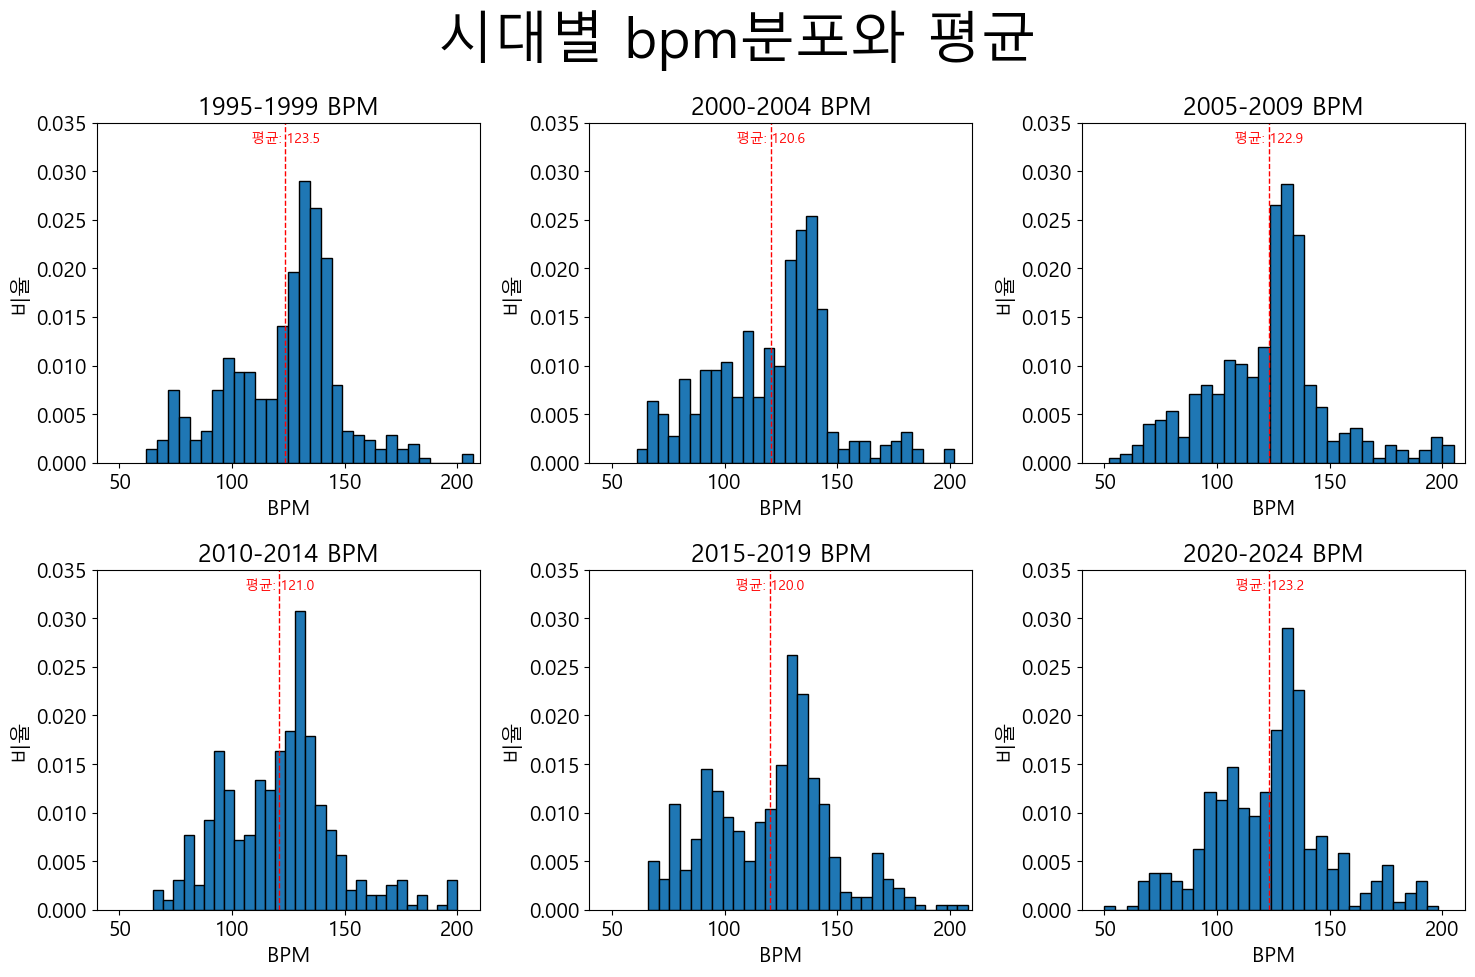

In [49]:
classes = sorted(df['classes'].unique())

# 2x3 그리드로 subplot 생성
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
fig.suptitle('시대별 bpm분포와 평균',fontsize=40)
# 각 클래스별로 히스토그램 그리기 (비율)
for i, cls in enumerate(classes):
    class_data = df[df['classes'] == cls]
    mean_bpm = class_data['bpm'].mean()  # 평균 계산

    # 비율 기반 히스토그램
    axes[i].hist(class_data['bpm'], bins=30, edgecolor='black', density=True)
    axes[i].set_xlabel('BPM')
    axes[i].set_ylabel('비율')
    axes[i].set_ylim(0, 0.035)
    axes[i].set_xlim(40,210)

    # 평균 BPM을 빨간 점선과 함께 표시
    axes[i].axvline(mean_bpm, color='red', linestyle='--', linewidth=1)

    # 평균값을 주석으로 추가 (x=평균bpm, y=최대y의 95% 지점)
    axes[i].text(mean_bpm, 0.033, f'평균: {mean_bpm:.1f}', color='red', ha='center', fontsize=10)

names = ['1995-1999','2000-2004','2005-2009','2010-2014','2015-2019','2020-2024']
for i, name in enumerate(names):
    axes[i].set_title(f'{name} BPM')

# 사용하지 않는 subplot 제거
if len(classes) < len(axes):
    for j in range(len(classes), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

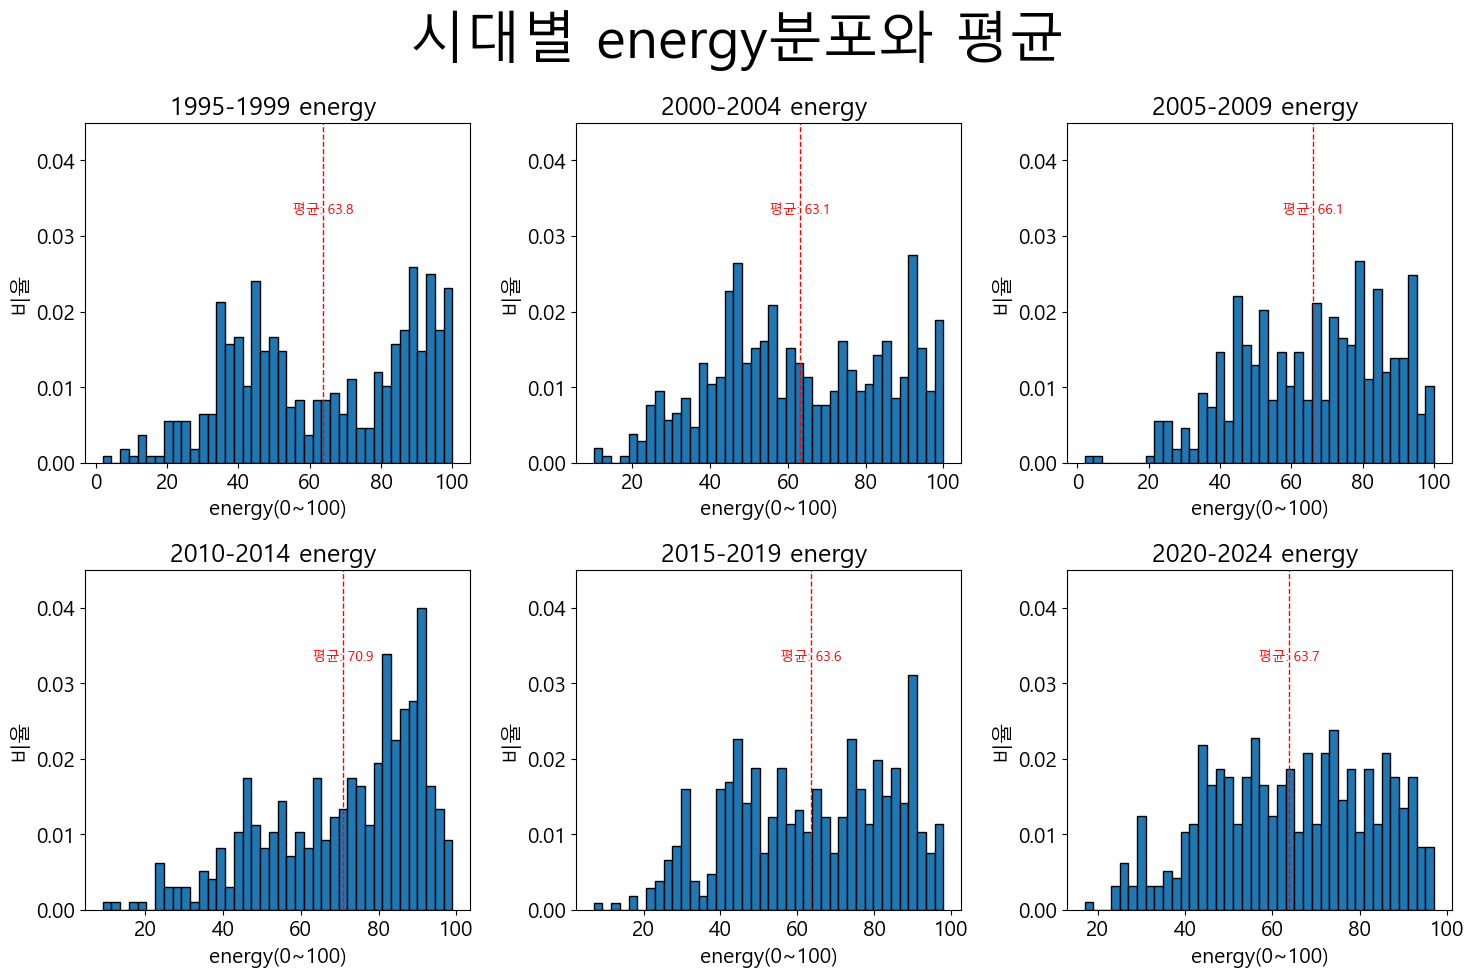

In [50]:
classes = sorted(df['classes'].unique())

# 2x3 그리드로 subplot 생성
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) # figsize로 전체 그림 크기 조절 가능
axes = axes.flatten() # axes를 1차원 배열로 만듭니다. 인덱싱이 쉬워집니다.
fig.suptitle('시대별 energy분포와 평균',fontsize=40)
# 각 클래스별로 히스토그램 그리기
for i, cls in enumerate(classes):
    # 해당 클래스 데이터 필터링
    class_data = df[df['classes'] == cls]
    mean_energy = class_data['energy'].mean()
    
    # 서브플롯에 히스토그램 그리기
    axes[i].hist(class_data['energy'], bins=40, edgecolor='black',density=True) # bins는 막대 개수, edgecolor로 막대 구분선 추가
#    axes[i].set_title(f'Class {cls} BPM Histogram')
    axes[i].set_xlabel('energy(0~100)')
    axes[i].set_ylabel('비율')
    axes[i].set_ylim(0,0.045)
    # 평균 BPM을 빨간 점선과 함께 표시
    axes[i].axvline(mean_energy, color='red', linestyle='--', linewidth=1)

    # 평균값을 주석으로 추가 (x=평균bpm, y=최대y의 95% 지점)
    axes[i].text(mean_energy, 0.033, f'평균: {mean_energy:.1f}', color='red', ha='center', fontsize=10)
    
names = ['1995-1999','2000-2004','2005-2009','2010-2014','2015-2019','2020-2024']
for i, name in enumerate(names):
    axes[i].set_title(f'{name} energy ')

# 사용하지 않는 서브플롯이 있다면 숨기기 (클래스 개수가 6개 미만일 경우)
if len(classes) < len(axes):
    for j in range(len(classes), len(axes)):
        fig.delaxes(axes[j])

# 서브플롯 간 간격 자동 조절
plt.tight_layout()

# 플롯 표시
plt.show()

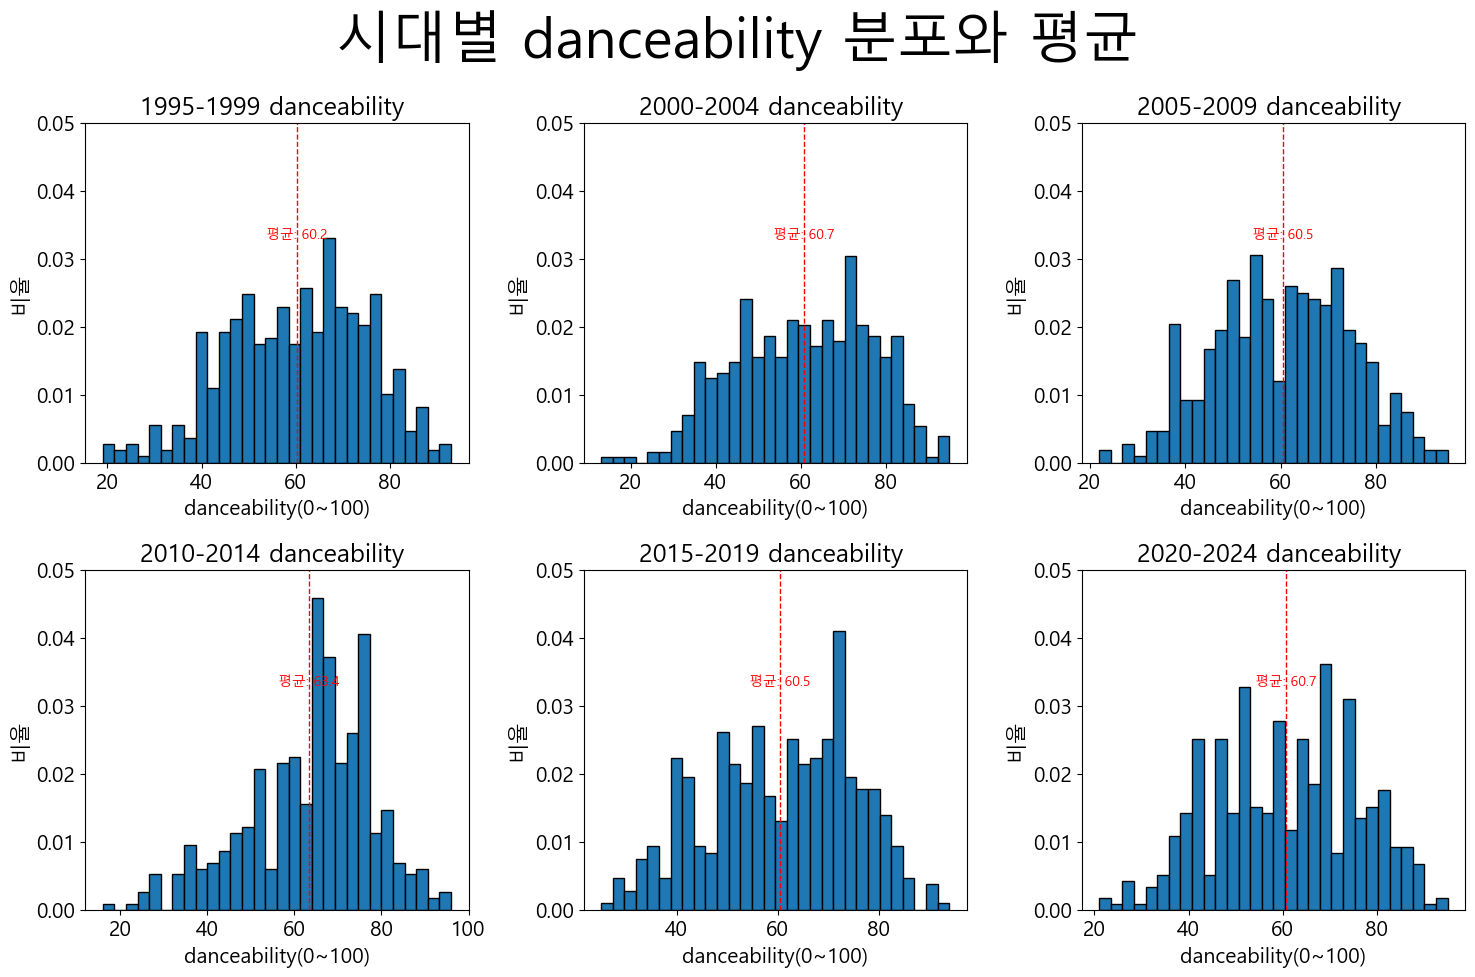

In [54]:
classes = sorted(df['classes'].unique())

# 2x3 그리드로 subplot 생성
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) # figsize로 전체 그림 크기 조절 가능
axes = axes.flatten() # axes를 1차원 배열로 만듭니다. 인덱싱이 쉬워집니다.
fig.suptitle('시대별 danceability 분포와 평균',fontsize=40)
# 각 클래스별로 히스토그램 그리기
for i, cls in enumerate(classes):
    # 해당 클래스 데이터 필터링
    class_data = df[df['classes'] == cls]
    mean_dan = class_data['danceability'].mean()
    # 서브플롯에 히스토그램 그리기
    axes[i].hist(class_data['danceability'], bins=30, edgecolor='black',density=True) # bins는 막대 개수, edgecolor로 막대 구분선 추가
#    axes[i].set_title(f'Class {cls} BPM Histogram')
    axes[i].set_xlabel('danceability(0~100)')
    axes[i].set_ylabel('비율')
    axes[i].set_ylim(0,0.05)
    axes[i].axvline(mean_dan, color='red', linestyle='--', linewidth=1)

    # 평균값을 주석으로 추가 (x=평균bpm, y=최대y의 95% 지점)
    axes[i].text(mean_dan, 0.033, f'평균: {mean_dan:.1f}', color='red', ha='center', fontsize=10)
# 사용하지 않는 서브플롯이 있다면 숨기기 (클래스 개수가 6개 미만일 경우)

names = ['1995-1999','2000-2004','2005-2009','2010-2014','2015-2019','2020-2024']
for i, name in enumerate(names):
    axes[i].set_title(f'{name} danceability ')
if len(classes) < len(axes):
    for j in range(len(classes), len(axes)):
        fig.delaxes(axes[j])

# 서브플롯 간 간격 자동 조절
plt.tight_layout()

# 플롯 표시
plt.show()

In [73]:
df=pd.read_csv('./chart_in_final_classes.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,artist_song,song_x,artist_x,genre,lyric,like,year_x,artist_y,...,energy,danceability,happiness,acousticness,instrumentalness,liveness,speechiness,loudness,year,classes
0,0,0,김건모 잘못된 만남,잘못된 만남,김건모,댄스,난 너를 믿었던 만큼 난 내 친구도 믿었기에 난 아무런 부담없이 널 내 친구에게 소...,"15,158",1995,Kim Gun Mo,...,96,73,86,4,0,4.0,5.0,-3 dB,1995,0.0
1,1,1,녹색지대 사랑을 할꺼야,사랑을 할꺼야,녹색지대,발라드,이젠 나도 널 잊겠어 너무 힘이 들잖아 원하는 대로 해줄 순 있지만 난 더 이상 해...,"1,177",1995,녹색지대,...,45,54,36,6,0,14.0,3.0,-11 dB,1995,0.0
2,2,2,솔리드 이 밤의 끝을 잡고,이 밤의 끝을 잡고,솔리드,R&B/Soul,다신 널 볼 수 없겠지 나의 입술이 너의 하얀 어깨를 감싸 안으며 그렇게 우린 이 ...,"2,180",1995,Solid,...,51,60,45,18,0,9.0,3.0,-7 dB,1995,0.0
3,3,3,015B 슬픈 인연,슬픈 인연,015B,발라드,멀어져 가는 저 뒷모습을 바라보면서 난 아직도 이 순간을 이별이라 하지 않겠네 달콤...,"10,661",1995,015B,...,30,41,32,74,0,9.0,3.0,-13 dB,1995,0.0
4,4,4,K2 김성면 슬프도록 아름다운 ...,슬프도록 아름다운 ...,K2 김성면,록/메탈,그리움의 끝엔 언제나 눈물 속에 항상 네가 있는 것은 돌아갈 수 없는 아픔인듯 시린...,"2,262",1995,KIM sung myun,...,41,47,20,22,0,15.0,3.0,-6 dB,1995,0.0


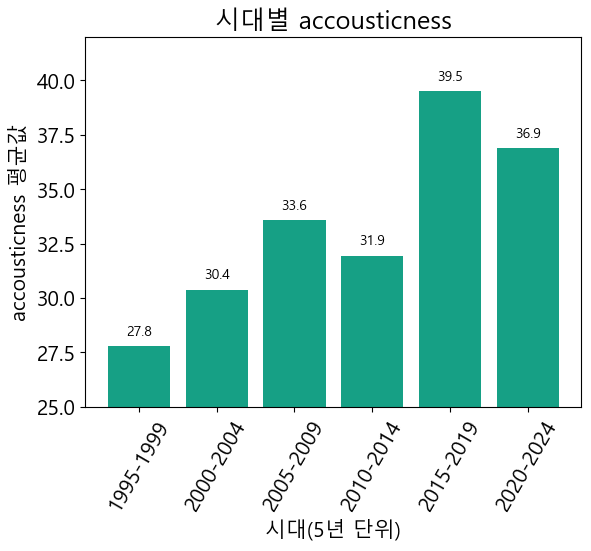

In [88]:
plt.title('시대별 accousticness')
plt.bar(range(6),list(df.groupby('classes')['acousticness'].mean()),color='#16A085')
plt.ylabel('accousticness 평균값')
plt.ylim(25,42)
plt.xticks([0, 1, 2, 3, 4, 5],['1995-1999','2000-2004','2005-2009','2010-2014','2015-2019','2020-2024'],rotation=60)
for a,b in enumerate(list(df.groupby('classes')['acousticness'].mean())):
    plt.text(a,b+0.5,np.round(b,1),ha='center',size=10)
plt.xlabel('시대(5년 단위)')
plt.show()


In [ ]:
df=pd.read_csv('./chart_in_visualization.csv',encoding='utf-8')

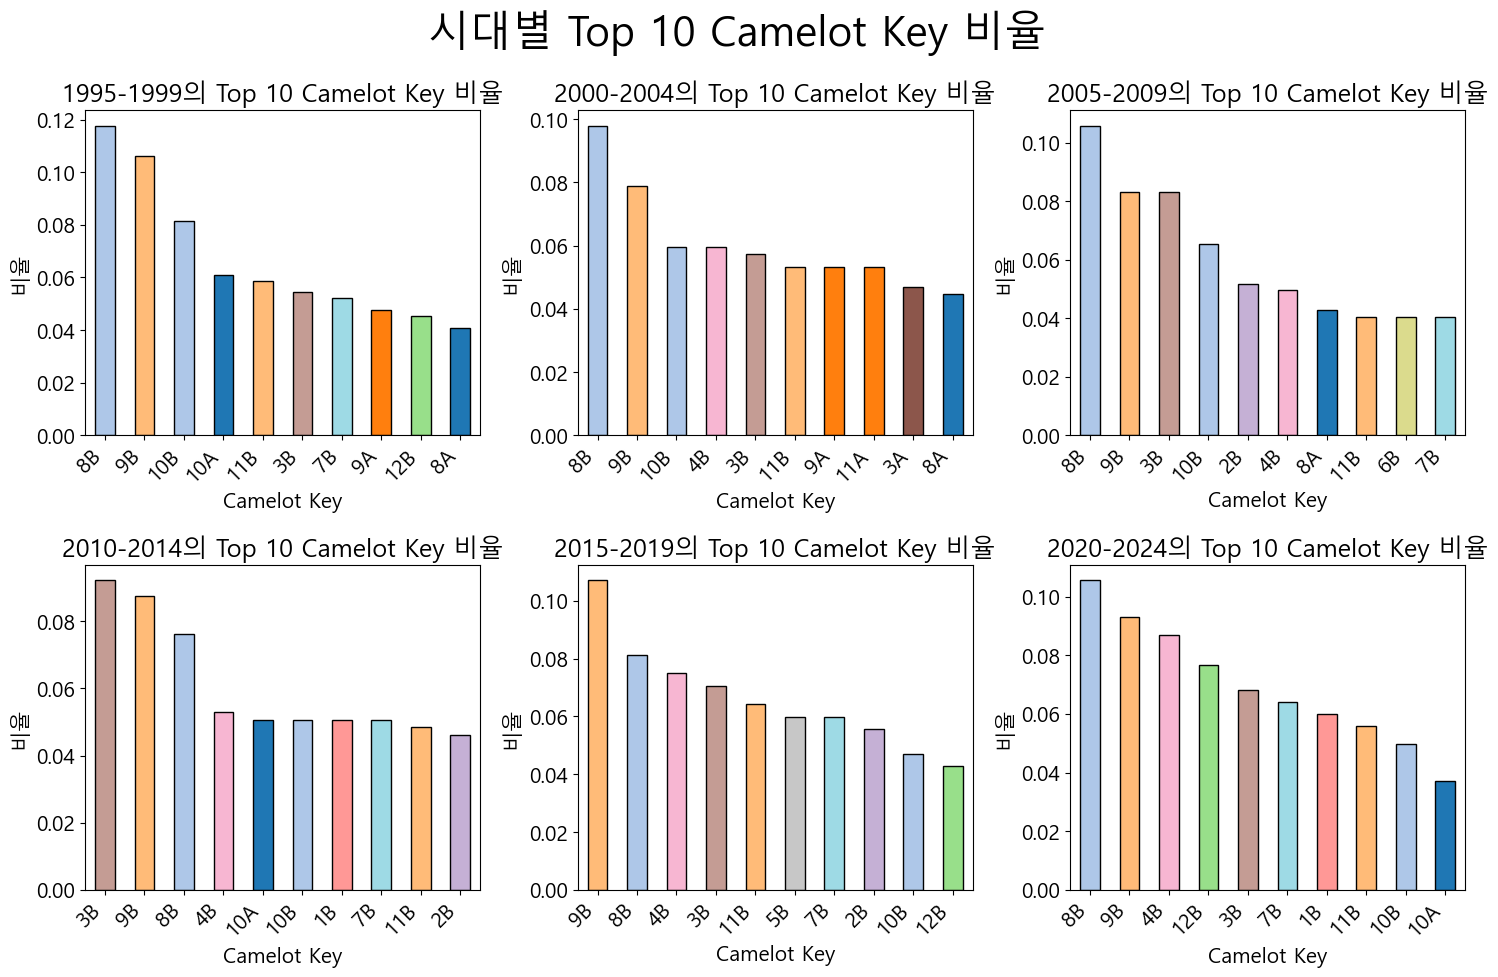

In [113]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  
matplotlib.rcParams['font.size'] = 15 
matplotlib.rcParams['axes.unicode_minus'] = False

# 고정 색상 팔레트 정의 (예: 12개 키 * 2개 모드 = 24개)
camelot_keys = sorted(df['camelot'].dropna().unique())  # 존재하는 camelot 키만 사용
color_map = plt.get_cmap('tab20')  # 최대 20개까지 구분 가능
color_dict = {key: color_map(i % 20) for i, key in enumerate(camelot_keys)}  # key별 고정 색상

classes = sorted(df['classes'].unique())
names = ['1995-1999','2000-2004','2005-2009','2010-2014','2015-2019','2020-2024']
# 2x3 그리드로 subplot 생성
nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10))
axes = axes.flatten()
fig.suptitle('시대별 Top 10 Camelot Key 비율',fontsize=30)
for i, cls in enumerate(classes):
    if i >= len(axes):
        print(f"More classes ({len(classes)}) than subplots ({len(axes)}). Skipping class {cls}.")
        break

    ax = axes[i]
    class_data = df[df['classes'] == cls]

    if not class_data.empty:
        camelot_counts = class_data['camelot'].value_counts()
        camelot_proportions = camelot_counts / len(class_data)
        top_proportions = camelot_proportions.head(10)

        # 색상 리스트 만들기
        bar_colors = [color_dict.get(k, 'gray') for k in top_proportions.index]

        # bar plot 그리기
        top_proportions.plot(kind='bar', ax=ax, color=bar_colors, edgecolor='black')

        ax.set_title(f'{names[i]}의 Top 10 Camelot Key 비율')
        ax.set_xlabel('Camelot Key')
        ax.set_ylabel('비율')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        # 백분율로 y축 표시하려면 주석 해제
        # import matplotlib.ticker as mtick
        # ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    else:
        fig.delaxes(ax)
        print(f"No data found for Class {cls} to plot Camelot proportions. Hiding subplot {i}.")

for j in range(len(classes), len(axes)):
    if axes[j] in fig.axes:
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


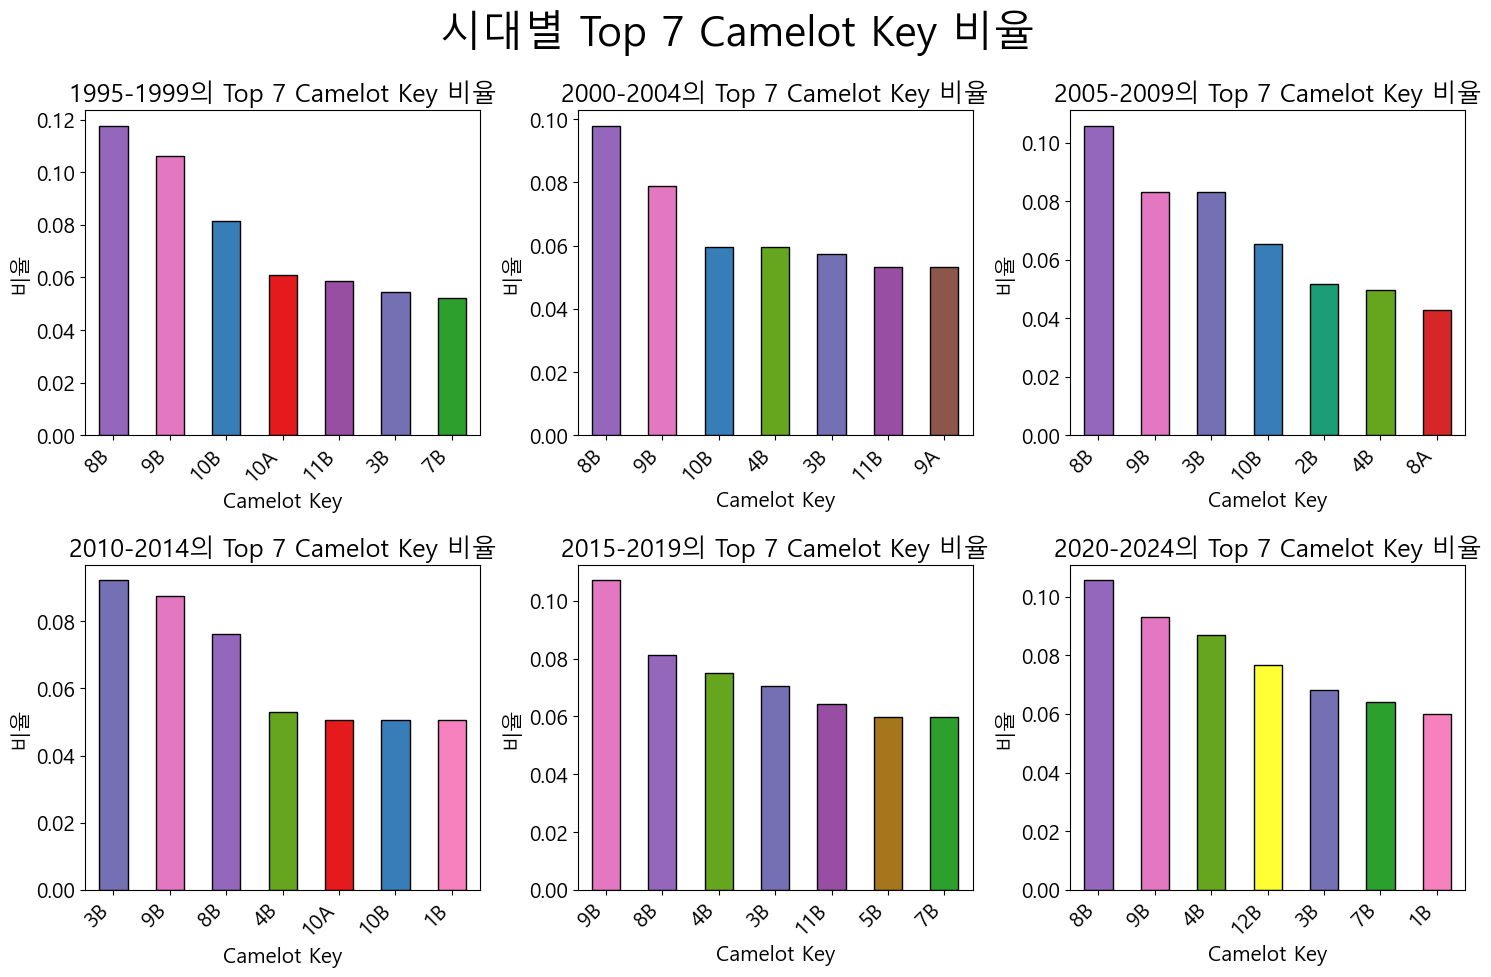

In [115]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import get_cmap

from itertools import cycle
from matplotlib.colors import ListedColormap

matplotlib.rcParams['font.family'] = 'Malgun Gothic'  
matplotlib.rcParams['font.size'] = 15 
matplotlib.rcParams['axes.unicode_minus'] = False

# camelot 키 고정 및 색상 매핑
camelot_keys = sorted(df['camelot'].dropna().unique())

# 진한 색상 팔레트 조합
set1 = plt.get_cmap('Set1').colors  # 9개
dark2 = plt.get_cmap('Dark2').colors  # 8개
tab10 = plt.get_cmap('tab10').colors  # 10개

# 총 27개 색상 조합 (중복 없이 진하게)
combined_colors = list(set1) + list(dark2) + list(tab10)
color_cycle = cycle(combined_colors)  # 부족하면 반복

# 각 camelot key에 색상 지정
color_dict = {key: next(color_cycle) for key in camelot_keys}

classes = sorted(df['classes'].unique())
names = ['1995-1999','2000-2004','2005-2009','2010-2014','2015-2019','2020-2024']
# 2x3 그리드 생성
nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10))
axes = axes.flatten()
fig.suptitle('시대별 Top 7 Camelot Key 비율',fontsize=30)
for i, cls in enumerate(classes):
    if i >= len(axes):
        print(f"More classes ({len(classes)}) than subplots ({len(axes)}). Skipping class {cls}.")
        break

    ax = axes[i]
    class_data = df[df['classes'] == cls]

    if not class_data.empty:
        camelot_counts = class_data['camelot'].value_counts()
        camelot_proportions = camelot_counts / len(class_data)

        # 상위 5개만 표시
        top_proportions = camelot_proportions.head(7)

        # 막대 색상 설정
        bar_colors = [color_dict.get(k, 'gray') for k in top_proportions.index]

        top_proportions.plot(kind='bar', ax=ax, color=bar_colors, edgecolor='black')

        ax.set_title(f'{names[i]}의 Top 7 Camelot Key 비율')
        ax.set_xlabel('Camelot Key')
        ax.set_ylabel('비율')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    else:
        fig.delaxes(ax)
        print(f"No data found for Class {cls} to plot Camelot proportions. Hiding subplot {i}.")

# 안 쓰는 subplot 제거
for j in range(len(classes), len(axes)):
    if axes[j] in fig.axes:
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



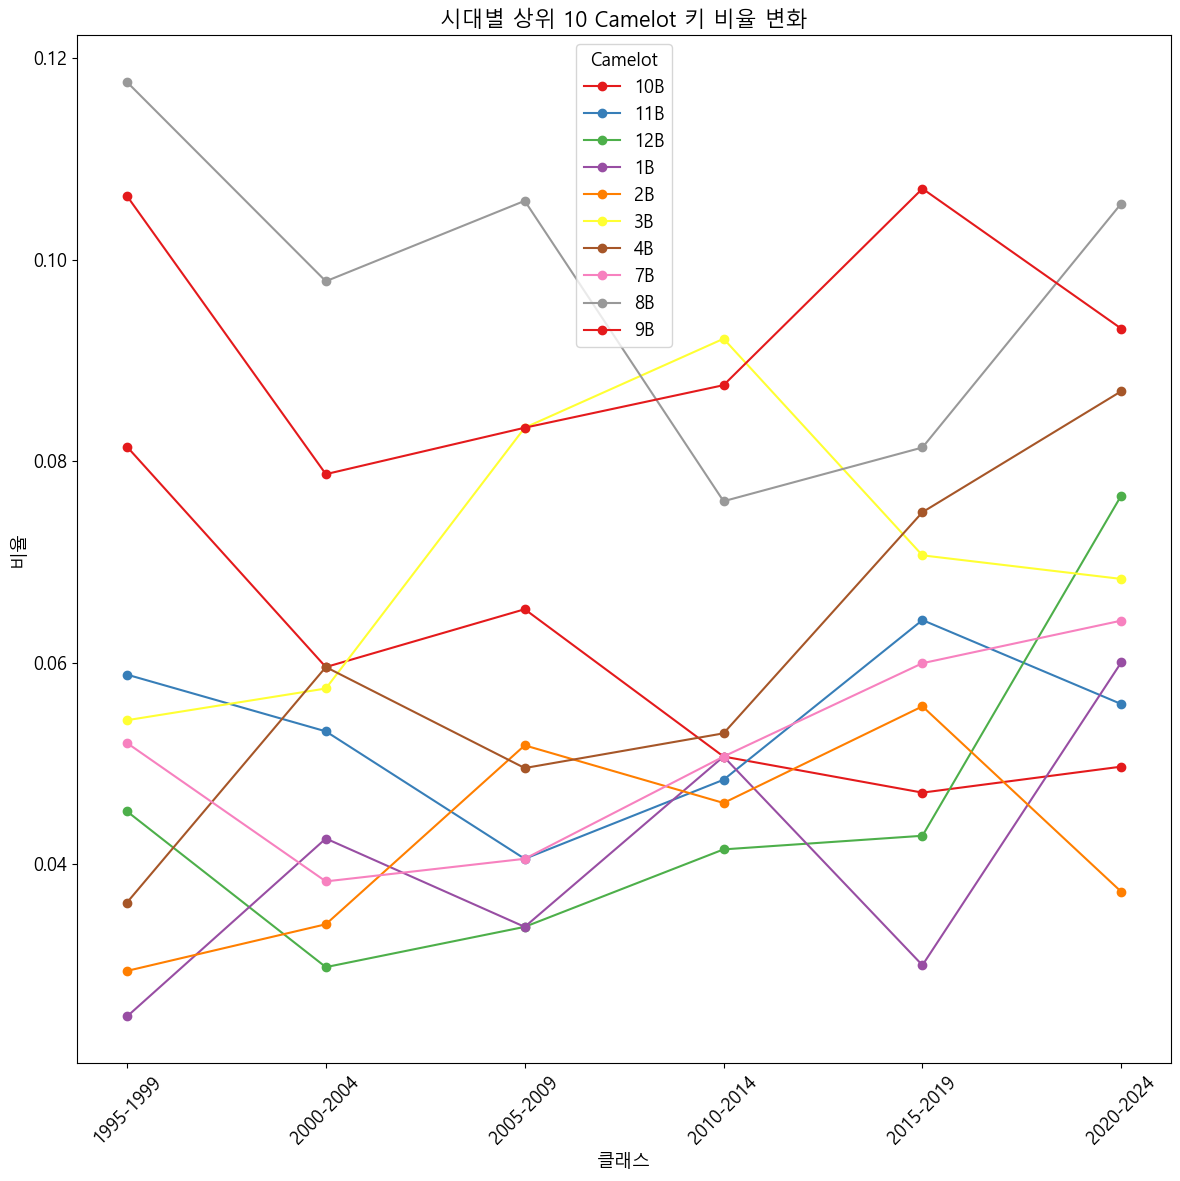

In [111]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  
matplotlib.rcParams['font.size'] = 13 
matplotlib.rcParams['axes.unicode_minus'] = False

# 1. 클래스-카멜롯별 개수 계산 후 비율 구하기
pivot_data = (
    df.groupby(['classes', 'camelot'])
    .size()
    .reset_index(name='count')
)

# 클래스별 총합 대비 비율 계산
pivot_data['proportion'] = pivot_data.groupby('classes')['count'].transform(lambda x: x / x.sum())

# 2. 전체에서 많이 등장한 camelot 키 상위 5개 선택
top_camelots = (
    df['camelot'].value_counts()
    .head(10)
    .index
)

# 3. 해당 키만 필터링해서 pivot
plot_df = pivot_data[pivot_data['camelot'].isin(top_camelots)]
plot_pivot = plot_df.pivot(index='classes', columns='camelot', values='proportion')
plot_pivot = plot_pivot.fillna(0).sort_index()

# 4. 진한 색상 팔레트 (Set1 사용)
colors = plt.get_cmap('Set1').colors
color_dict = {key: colors[i % len(colors)] for i, key in enumerate(plot_pivot.columns)}

# 5. 선 그래프 그리기
plt.figure(figsize=(12, 12))
for camelot in plot_pivot.columns:
    plt.plot(
        plot_pivot.index, 
        plot_pivot[camelot], 
        label=camelot, 
        color=color_dict[camelot], 
        marker='o'
    )

plt.title('시대별 상위 10 Camelot 키 비율 변화')
plt.xlabel('클래스')
plt.ylabel('비율')
plt.xticks( range(6),['1995-1999','2000-2004','2005-2009','2010-2014','2015-2019','2020-2024'],rotation=45)
plt.legend(title='Camelot')
plt.tight_layout()
plt.show()



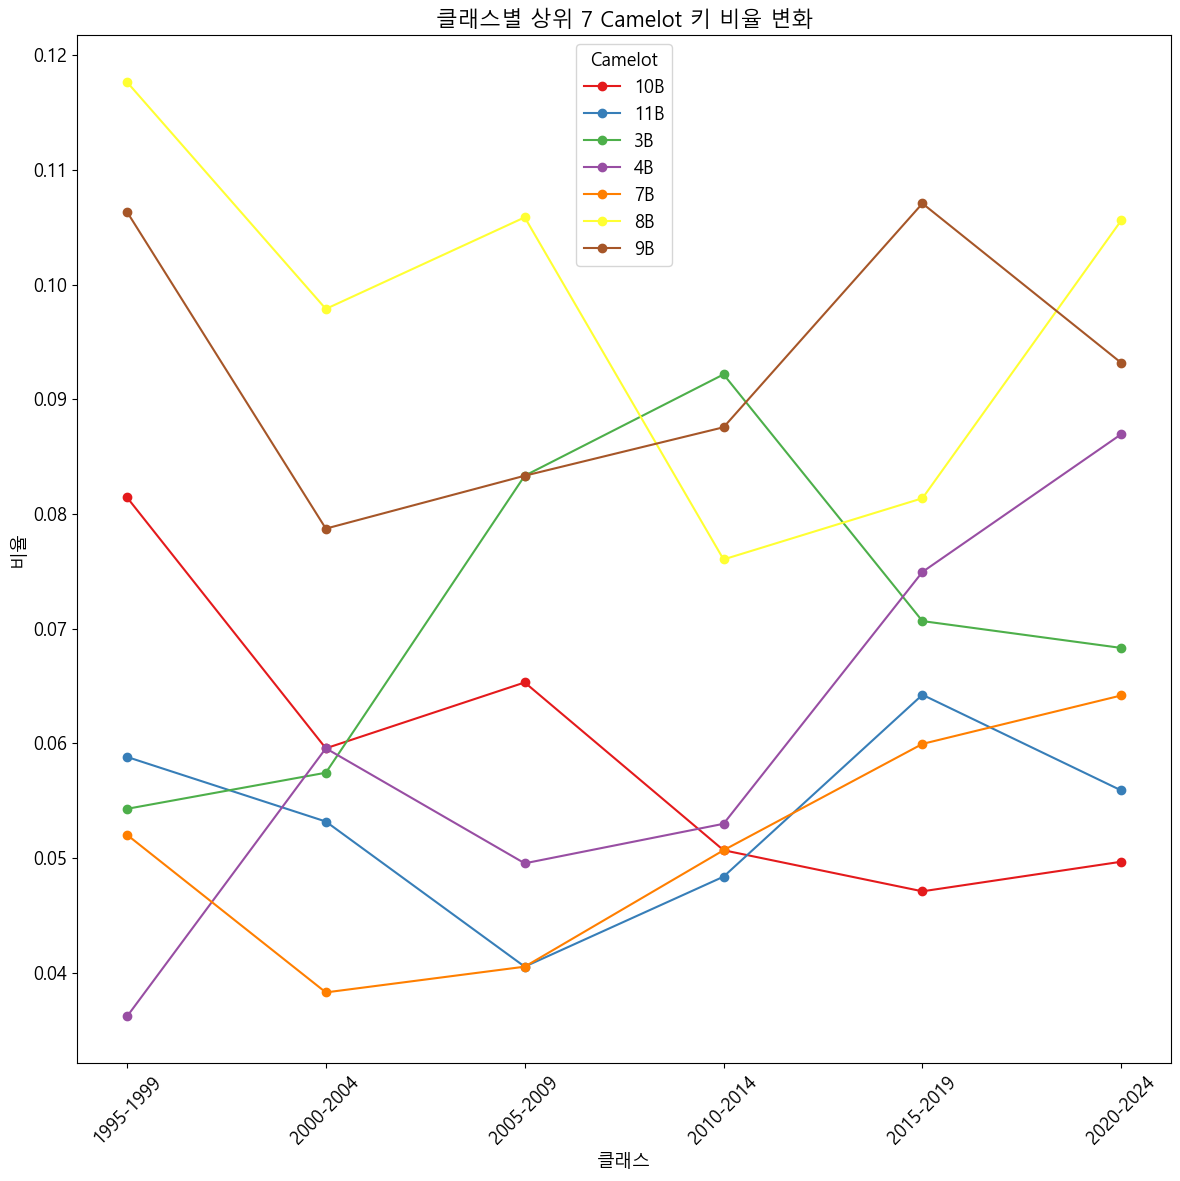

In [102]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  
matplotlib.rcParams['font.size'] = 13 
matplotlib.rcParams['axes.unicode_minus'] = False

# 1. 클래스-카멜롯별 개수 계산 후 비율 구하기
pivot_data = (
    df.groupby(['classes', 'camelot'])
    .size()
    .reset_index(name='count')
)

# 클래스별 총합 대비 비율 계산
pivot_data['proportion'] = pivot_data.groupby('classes')['count'].transform(lambda x: x / x.sum())

# 2. 전체에서 많이 등장한 camelot 키 상위 5개 선택
top_camelots = (
    df['camelot'].value_counts()
    .head(7)
    .index
)

# 3. 해당 키만 필터링해서 pivot
plot_df = pivot_data[pivot_data['camelot'].isin(top_camelots)]
plot_pivot = plot_df.pivot(index='classes', columns='camelot', values='proportion')
plot_pivot = plot_pivot.fillna(0).sort_index()

# 4. 진한 색상 팔레트 (Set1 사용)
colors = plt.get_cmap('Set1').colors
color_dict = {key: colors[i % len(colors)] for i, key in enumerate(plot_pivot.columns)}

# 5. 선 그래프 그리기
plt.figure(figsize=(12, 12))
for camelot in plot_pivot.columns:
    plt.plot(
        plot_pivot.index, 
        plot_pivot[camelot], 
        label=camelot, 
        color=color_dict[camelot], 
        marker='o'
    )

plt.title('클래스별 상위 7 Camelot 키 비율 변화')
plt.xlabel('클래스')
plt.ylabel('비율')
plt.xticks( range(6),['1995-1999','2000-2004','2005-2009','2010-2014','2015-2019','2020-2024'],rotation=45)
plt.legend(title='Camelot')
plt.tight_layout()
plt.show()


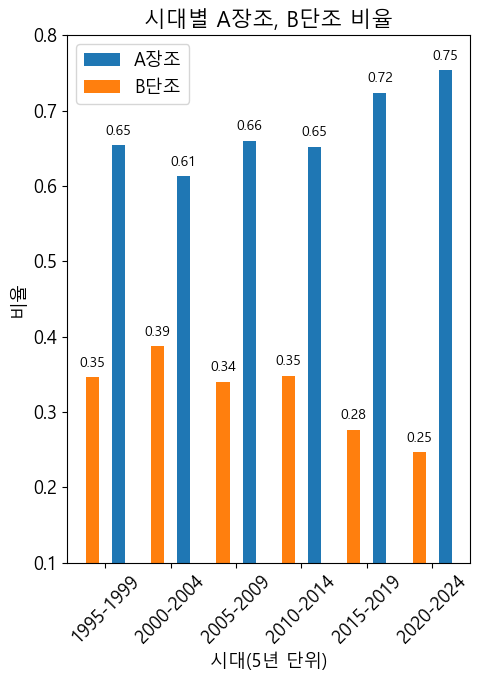

In [110]:
w = 0.2
plt.figure(figsize=(5, 7))

# 막대 그리기
bars1 = plt.bar(np.arange(6) + w, list(df.groupby('classes')['major_minor'].value_counts(normalize=True))[::2], width=w)
bars2 = plt.bar(np.arange(6) - w, list(df.groupby('classes')['major_minor'].value_counts(normalize=True))[1::2], width=w)

# 텍스트 추가
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{bar.get_height():.2f}',
             ha='center', va='bottom', fontsize=10)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{bar.get_height():.2f}',
             ha='center', va='bottom', fontsize=10)

# 기타 설정
plt.title('시대별 A장조, B단조 비율')
plt.legend(['A장조', 'B단조'])
plt.ylim(0.1, 0.8)
plt.xlabel('시대(5년 단위)')
plt.ylabel('비율')
plt.xticks(range(6), ['1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019', '2020-2024'], rotation=45)
plt.tight_layout()
plt.show()